In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")
import pandas as pd

In [2]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [3]:
X=mnist.data
y=mnist.target

In [4]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for i in range(1, 11):
  if (i%2)!=0:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("the accuracy for k=",i,"is=",accuracy)

the accuracy for k= 1 is= 0.9717142857142858
the accuracy for k= 3 is= 0.9702857142857143
the accuracy for k= 5 is= 0.9692571428571428
the accuracy for k= 7 is= 0.9672571428571428
the accuracy for k= 9 is= 0.9658285714285715


In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)
X_pca

array([[ 122.25525533,  316.23384391],
       [1010.49400346,  289.96362059],
       [ -58.99594719, -393.69744499],
       ...,
       [-271.50701323, -590.07850009],
       [-310.22482291,  116.72715081],
       [1058.86212574,   83.39253843]], shape=(70000, 2))

In [9]:
ypred1=y.astype(int)
ypred1

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

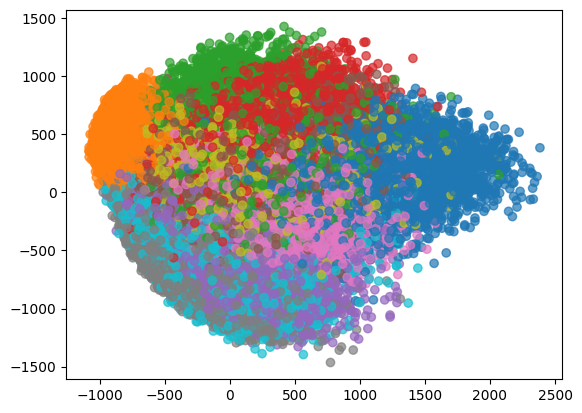

In [10]:
import matplotlib.pyplot as plt
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ypred1, cmap='tab10', alpha=0.7)

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[1700    1    5    0    0    1    4    1    1    1]
 [   0 1968    2    0    2    0    0    4    0    1]
 [  15   32 1665    6    3    3    6   23    5    3]
 [   1    6   16 1727    1   12    3   18    9   13]
 [   3   13    1    0 1532    0    2    3    1   32]
 [   4    7    0   20    2 1549   14    0    5    6]
 [   8    3    1    0    4    6 1739    0    0    0]
 [   1   30    7    1    4    0    0 1813    1   21]
 [   6   21    7   31    6   20    4   13 1532   17]
 [   6   10    3   13   18    1    2   20    2 1677]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1714
           1       0.94      1.00      0.97      1977
           2       0.98      0.95      0.96      1761
           3       0.96      0.96      0.96      1806
           4       0.97      0.97      0.97      1587
           5       0.97      0.96      0.97      1607
           6       0.98      0.99      0.98     